# Data Analysis For Germany Energy Planning

### Pre-Analysis

Let's start by importing the required libraries:
- Numpy & Pandas : For dataset and matrix operations,
- Matplotlib & Seaborn : For data visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Then import the data and do a pre-analysis:

In [2]:
dataset = pd.read_csv('time_series_60min_singleindex.csv')

dataset.head(10)

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN
5,2015-01-01T04:00:00Z,2015-01-01T05:00:00+0100,5309.0,6609.0,35.0,NaN,64.0,8487.0,8806.0,NaN,...,998.67,824.0,NaN,1.60,2626.0,2790.0,3.8,NaN,NaN,NaN
6,2015-01-01T05:00:00Z,2015-01-01T06:00:00+0100,5574.0,6543.0,35.0,NaN,84.0,8428.0,8805.0,NaN,...,1045.17,886.0,NaN,0.00,2641.0,2830.0,3.8,NaN,NaN,NaN
7,2015-01-01T06:00:00Z,2015-01-01T07:00:00+0100,5925.0,6851.0,36.0,NaN,131.0,8122.0,8651.0,NaN,...,1085.06,985.0,NaN,0.00,2622.0,2790.0,3.8,NaN,NaN,NaN
8,2015-01-01T07:00:00Z,2015-01-01T08:00:00+0100,6343.0,7061.0,36.0,2.0,109.0,8179.0,8674.0,NaN,...,1142.36,1109.0,NaN,0.00,2691.0,2980.0,3.9,NaN,NaN,NaN
9,2015-01-01T08:00:00Z,2015-01-01T09:00:00+0100,6882.0,7233.0,41.0,10.0,146.0,8340.0,9037.0,92.66,...,1206.03,1209.0,4.97,0.00,2794.0,3070.0,8.0,NaN,NaN,NaN


A dataset with 300 features. 298 of these 300 features are time series for 32 different European countries. We see that some values are NaN, but the country we are going to study (Germany) does not contain this type of data. Therefore, we do not need to pre-process the NaN data in our dataset for this case. Finally, let's look at how many samples we have in our data:

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Columns: 300 entries, utc_timestamp to UA_load_forecast_entsoe_transparency
dtypes: float64(298), object(2)
memory usage: 115.4+ MB


50401 samples. As data is received each every hour, 50401/24/365 = 5.75 years of data.

### Analyzing Data One by One

We chose Germany because of its complete examples. Now let's filter the total hourly load, generated solar energy and wind energy in Germany one by one from our dataset:

DE_Load_Act shape : (50400,)


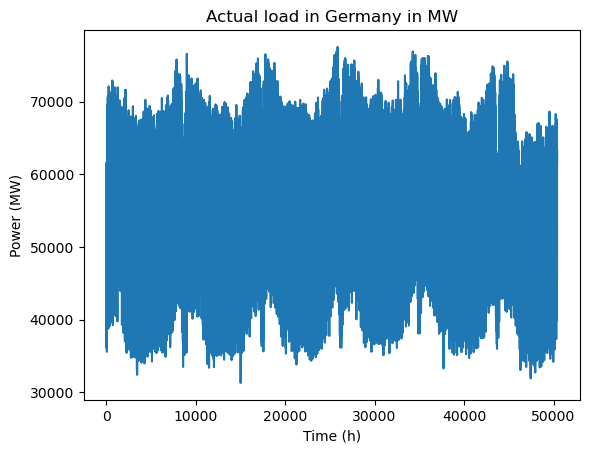

In [4]:
DE_Load_Act = dataset.loc[:, ['DE_load_actual_entsoe_transparency']].values
DE_Load_Act = DE_Load_Act[~np.isnan(DE_Load_Act)]

print('DE_Load_Act shape :', np.shape(DE_Load_Act))

plt.plot(DE_Load_Act)
plt.xlabel("Time (h)")
plt.ylabel("Power (MW)")
plt.title("Actual load in Germany in MW")
plt.show()

DE_Solar_Gen_Act shape : (50400,)


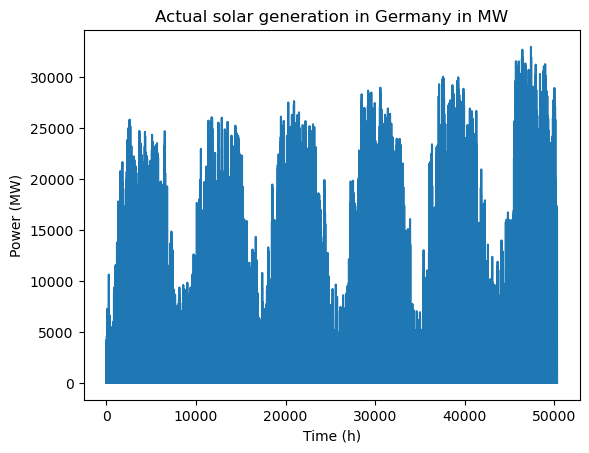

In [5]:
DE_Solar_Gen_Act = dataset.loc[:, ['DE_solar_generation_actual']].values
DE_Solar_Gen_Act = DE_Solar_Gen_Act[~np.isnan(DE_Solar_Gen_Act)]

print('DE_Solar_Gen_Act shape :', np.shape(DE_Load_Act))

plt.plot(DE_Solar_Gen_Act)
plt.xlabel("Time (h)")
plt.ylabel("Power (MW)")
plt.title("Actual solar generation in Germany in MW")
plt.show()

DE_Wind_Gen_Act shape : (50400,)


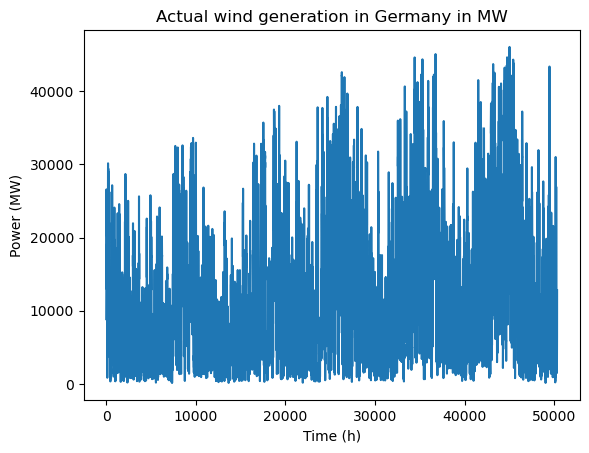

In [6]:
DE_Wind_Gen_Act = dataset.loc[:, ['DE_wind_generation_actual']].values
DE_Wind_Gen_Act = DE_Wind_Gen_Act[~np.isnan(DE_Wind_Gen_Act)]

print('DE_Wind_Gen_Act shape :', np.shape(DE_Load_Act))

plt.plot(DE_Wind_Gen_Act)
plt.xlabel("Time (h)")
plt.ylabel("Power (MW)")
plt.title("Actual wind generation in Germany in MW")
plt.show()

When we look at this data, we can use our intelligence to extract some features. Our goal is to detect these and other detailed features much more precisely using artificial intelligence.

### Analyzing the Relationship Between Datas

When we come to the last heading, let's try to better understand the relationship between Germany's energy production and consumption by comparing these 3 data with each other. Let's first create and analyze the Boxplot table showing the Q1, Q3, mean and outliar values of these 3 time series:

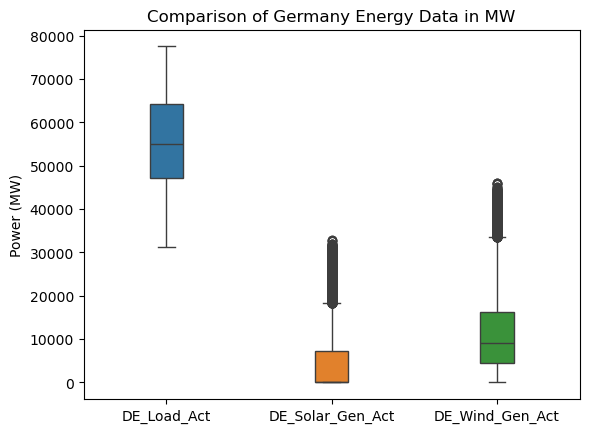

In [7]:
compare_df = pd.Series(DE_Load_Act, name="DE_Load_Act").to_frame().join(pd.Series(DE_Solar_Gen_Act, name="DE_Solar_Gen_Act").to_frame().join(pd.Series(DE_Wind_Gen_Act, name="DE_Wind_Gen_Act")))

plt.ylabel("Power (MW)")
plt.title("Comparison of Germany Energy Data in MW")
sns.boxplot(data=compare_df, width = 0.2)
plt.show()

When we look at the table, we see that in most cases consumption is higher than these two renewable energies. Now let's look at these three time-varying series in a single table:

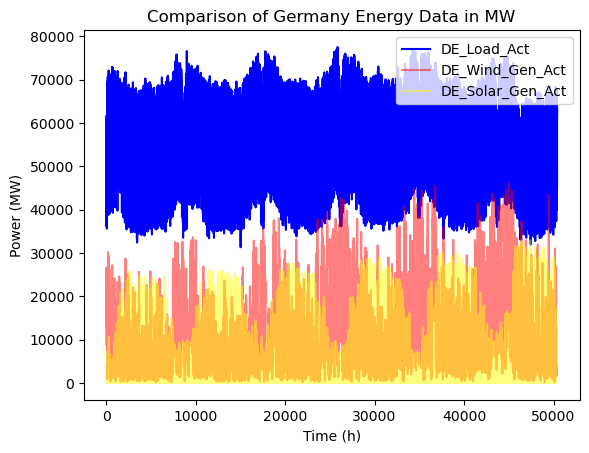

In [8]:
plt.plot(DE_Load_Act, color='blue', label='DE_Load_Act')
plt.plot(DE_Wind_Gen_Act, color='red', alpha=0.5, label='DE_Wind_Gen_Act')
plt.plot(DE_Solar_Gen_Act, color='yellow', alpha=0.5, label='DE_Solar_Gen_Act')
plt.xlabel("Time (h)")
plt.ylabel("Power (MW)")
plt.title("Comparison of Germany Energy Data in MW")
plt.legend(loc='upper right')
plt.show()

Then (and finally) let's obtain a correlation matrix and plot it:

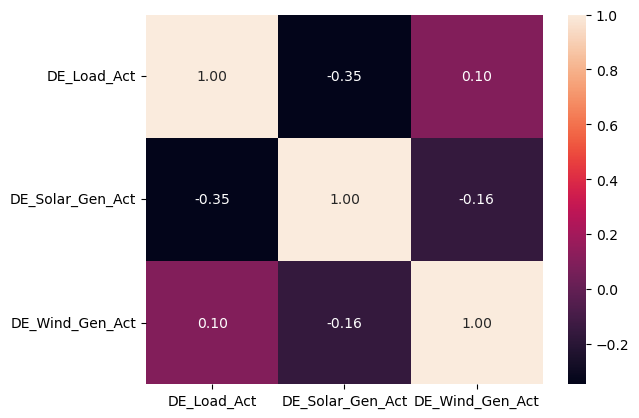

In [9]:
sns.heatmap(compare_df.corr(), annot=True, fmt=".2f")
plt.show()

Our data analysis is completed here. Now we can move on to model training and performance evaluation.